Confidential: Property of the Data Jedi Academy, unauthorised distribution not allowed

<img align="left" src = "DATA-JEDI logo.png" width="200" height="60">

## Exploratory Data Analysis: Basic Introduction

### Introduction
Exploratory Data Analysis is an approach in analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods.
EDA assists Data science professionals in various ways:-

1. Getting a better understanding of data, it's properties and distribution
2. Identifying various data patterns and relationships within the data which will be useful for data preprocessing, feature engineering and predictive modelling
3. Getting a better understanding of the problem statement 

[Exploratory Data Analysis](https://www.analyticsvidhya.com/blog/2021/04/mastering-exploratory-data-analysiseda-for-data-science-enthusiasts)



Content

1. Univariate Analysis
2. Bi-variate Analysis
3. Multi-variate Analysis

### Dataset

#### Importing the data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The dataset below contains 200 synthetic records of human height, weight and age of young adults (between 18 and 35 years old)

In [2]:
df = pd.read_csv('Preprocessing Tutorial Data.csv')

Typically before the indepth EDA, it is important to perform an inspection and some summary statistics to get a sense of what the data looks like. It is also very important to check the data types of each column because sometimes during data collection, it is possible for columns to have the wrong data types. For example Age column should always be "integer" and not an "object". In a case where this occurs, it is advised that you do a conversion before you commence full EDA. For conversion, you can use the following:

- [Astype method in Pandas (.astype())](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html) - Use this for converting from interger or float to string or float to integer
- [to_numeric method in Pandas (.to_numeric())](https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html#pandas.to_numeric) - Use this to convert string to float, ensure you set the 'errors'option to 'coerce' this will ensure that all values are converted to numeric and in a case where there are special characters they will be converted to NaN. By default, to_numeric converts to float first to avoid errors. You can then convert from float to int after this if needed.

In [3]:
#Summary Statistics
df.describe()

,Height(cm),Weight(kg),Age
count,196.000000,197.000000,195.000000
mean,169.357143,66.918782,28.205128
std,22.872557,15.849854,17.603566
min,10.000000,14.000000,5.000000
25%,169.000000,61.000000,20.000000
50%,172.000000,66.000000,26.000000
75%,176.000000,71.000000,31.000000
max,188.000000,170.000000,150.000000


In [4]:
#Inspect data
df.head()

,Height(cm),Weight(kg),Age
0,167.0,59.0,35.0
1,182.0,65.0,34.0
2,176.0,77.0,26.0
3,173.0,76.0,20.0
4,172.0,73.0,23.0


In [4]:
#Inspect columns
df.dtypes

Height(cm)    float64
Weight(kg)    float64
Age           float64
dtype: object

### 1. Univariate Analysis

At this stage, we explore variables one by one. Method to perform uni-variate analysis will depend on whether the variable type is categorical or continuous. Let’s look at these methods and statistical measures for categorical and continuous variables individually:

#### i. Continuous Variables:- 
In case of continuous variables, we need to understand the central tendency and spread of the variable. These are measured using various statistical metrics visualization methods as shown below. 

#### a. Histogram - 
It is similar to a Bar Chart, but a histogram groups numbers into ranges. The height of each bar shows how many fall into each range. And you decide what ranges to use!

#### b. Boxplot 
A box and whisker plot—also called a box plot—displays the five-number summary of a set of data. The five-number summary is the minimum, first quartile, median, third quartile, and maximum.
In a box plot, we draw a box from the first quartile to the third quartile. A vertical line goes through the box at the median. The whiskers go from each quartile to the minimum or maximum. [Boxplot](https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/box-plot-review)

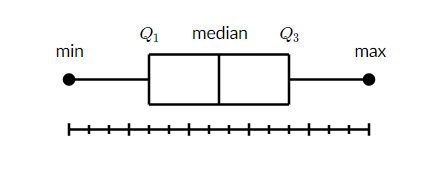

Univariate analysis is also used to highlight missing and outlier values.

<AxesSubplot:>

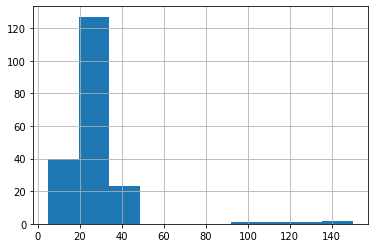

In [5]:
#Histogram
df['Age'].hist()

c:\users\ay_de\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age'>

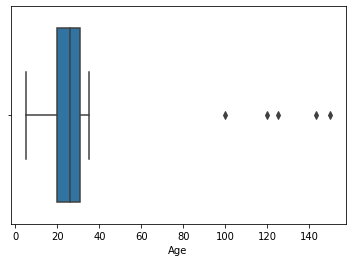

In [6]:
sns.boxplot(df['Age'])

#### ii. Categorical Variables:- 
For categorical variables, we’ll use frequency table to understand distribution of each category. We can also read as percentage of values under each category. It can be be measured using two metrics, Count and Count% against each category. This can be visualised using:

#### a. Bar chart - 
A bar chart is a graph with rectangular bars. The graph usually compares categories. Although the graphs can be plotted vertically (bars standing up) or horizontally (bars laying flat from left to right). , the mostcommon type of bar graph is vertical. The horizontal (x) axis represents the categories; the vertical (y) axis represents a value for those categories (count or percentages).

#### b. Table - 
Information (numerical and quantitative) arranged in rows and columns.

In [7]:
#Create Age group categorical variable
df['Age_group'] = pd.cut(x=df['Age'], bins=[1, 18, 25, 35, 200],
                    labels=['1 to 18', '19 to 25', '26 to 35','others'])

The above creates an Age_group column which is a categorical variable that can be used for analysis. This will typically be useful in cases where analysis needs to be done at a age group level.

<AxesSubplot:xlabel='Age_group', ylabel='count'>

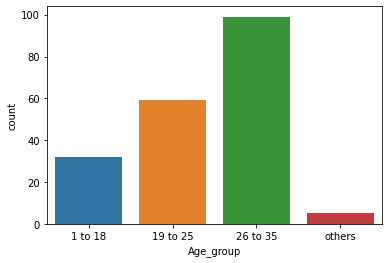

In [8]:
#Bar Chart
sns.countplot(x='Age_group',data = df)

In [9]:
#Table
Age_group_count = df['Age_group'].value_counts().reset_index()
Age_group_count.columns = ['Age_group','Count']
Age_group_count

,Age_group,Count
0,26 to 35,99
1,19 to 25,59
2,1 to 18,32
3,others,5


### 2. Bivariate Analysis

Bi-variate Analysis finds out the relationship between two variables. Here, we look for association and disassociation between variables at a pre-defined significance level.

###### It is typically advisable to have a hypothesis when working with bivariate or multivariate analysis. This hypothesis could be as simple as height of a person is strongly related to their weight or related to their age. You can then use your analysis to prove or disprove this.

We can perform bi-variate analysis for any combination of categorical and continuous variables. The combination can be: Categorical & Categorical, Categorical & Continuous and Continuous & Continuous. Different methods are used to tackle these combinations during analysis process.

Let’s understand the possible combinations in detail:

#### i. Continuous & Continuous :- 
While doing bi-variate analysis between two continuous variables, the following can be used:

#### a. Scatter plot 
The pattern of scatter plot indicates the relationship between variables. The relationship can be linear or non-linear. However, it does not indicate the strength of relationship amongst them. To find the strength of the relationship, we use Correlation. 

#### b. Correlation varies between -1 and +1.
Correlation measures the strength of the relationship between two variables and it varies between -1 and +1.

-1: perfect negative linear correlation

+1: perfect positive linear correlation and 

 0: No correlation

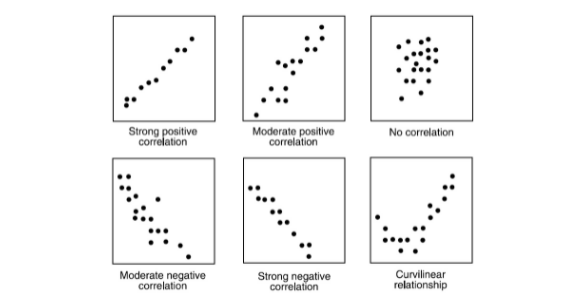

#### c. Pairplot
It visualizes given data to find the relationship between them where the variables are continuous. The pairplot performs both  univariate and bivariate analysis on your dataset features all in one chart.

<AxesSubplot:xlabel='Height(cm)', ylabel='Weight(kg)'>

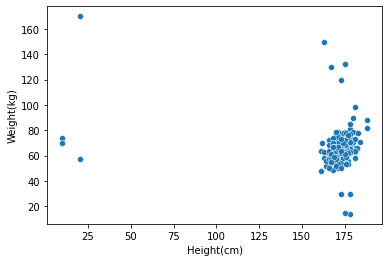

In [26]:
#Create a scatter plot
sns.scatterplot(data = df,x='Height(cm)',y='Weight(kg)')

Correlation figures can be obtained by using the corr() method and visualised using a correlation heatmap as seen below.

In [27]:
#Use the corr() method to obtain the correlation figures
df.corr()

,Height(cm),Weight(kg),Age,BMI
Height(cm),1.000000,-0.202183,-0.176190,-0.891185
Weight(kg),-0.202183,1.000000,0.324998,0.208337
Age,-0.176190,0.324998,1.000000,0.166214
BMI,-0.891185,0.208337,0.166214,1.000000


<AxesSubplot:>

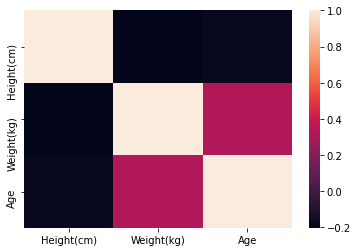

In [12]:
#Using Seaborn to visualise correlation figures

sns.heatmap(df.corr())

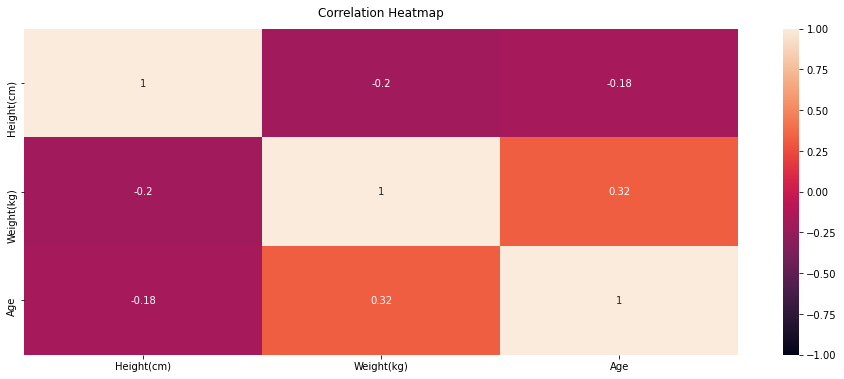

In [13]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))

# Store heatmap object in a variable to easily access it and include more features(such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, 
#and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

.

c:\users\ay_de\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


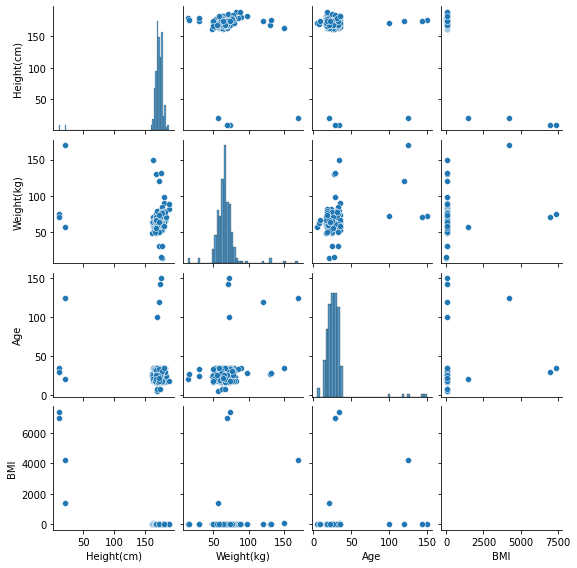

In [28]:
#Create a pairplot
sns.pairplot(df,size = 2)

plt.show()

#### ii. Categorical & Categorical:-

To find the relationship between two categorical variables, we can use following methods:

#### a. Two-way table: 
We can start analyzing the relationship by creating a two-way table of count and count%. The rows represents the category of one variable and the columns represent the categories of the other variable. We show count or count% of observations available in each combination of row and column categories.

#### b. Stacked Column Chart: 
This method is more of a visual form of Two-way table.

In [14]:
#Create Body Mass Index (BMI) variable and BMI groups
#Body Mass Index is a simple calculation using a person's height and weight. 
#The formula is BMI = kg/m2 where kg is a person's weight in kilograms and m2 is their height in metres squared. 

df['BMI'] = df['Weight(kg)']/(df['Height(cm)']/100)**2


In [15]:
#A BMI of 25.0 or more is overweight, while the healthy range is 18.5 to 24.9. BMI applies to most adults 18-65 years.
df['BMI_group'] = pd.cut(x=df['BMI'], bins=[18.4, 18.5, 24.9, 25],
                    labels=['underweight','normal','overweight'])

In [21]:
#Create 2 way table of categorical to categorical
Two_way = df.groupby(['Age_group', 'BMI_group'])['BMI_group'].count()
Two_way.unstack().fillna(0)

BMI_group,underweight,normal,overweight
Age_group,,,
1 to 18,0,25,0
19 to 25,0,44,0
26 to 35,0,72,0
others,0,2,1


In [22]:
#Create Stacked column chart
agg_BMI = Two_way.unstack().fillna(0)
agg_BMI

BMI_group,underweight,normal,overweight
Age_group,,,
1 to 18,0,25,0
19 to 25,0,44,0
26 to 35,0,72,0
others,0,2,1


(array([0, 1, 2, 3]),
 [Text(0, 0, '1 to 18'),
  Text(1, 0, '19 to 25'),
  Text(2, 0, '26 to 35'),
  Text(3, 0, 'others')])

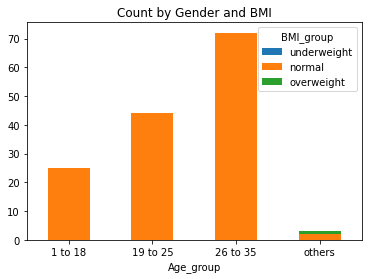

In [23]:
agg_BMI.plot(kind='bar', stacked=True)

# Just add a title and rotate the x-axis labels to be horizontal.
plt.title('Count by Gender and BMI')
plt.xticks(rotation=0, ha='center')

[for more on stacked column charts](https://www.pythoncharts.com/python/stacked-bar-charts/)

.

#### iii. Categorical & Continuous: 
While exploring relation between categorical and continuous variables, we can draw box plots for each level of categorical variables. 

c:\users\ay_de\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age_group', ylabel='Weight(kg)'>

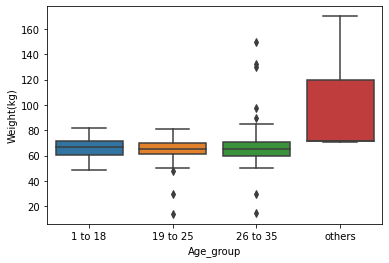

In [51]:
#Create Box plot for categorical & continuous
sns.boxplot(df['Age_group'],df['Weight(kg)'])

### 3. Multivariate Analysis

Multivariate analysis is required when more than two variables have to be analyzed simultaneously. It is a tremendously hard task for the human brain to visualize a relationship among 4 variables in a graph and thus multivariate analysis is used to study more complex sets of data. Types of Multivariate Analysis include Cluster Analysis, Factor Analysis, Multiple Regression Analysis, Principal Component Analysis, etc. For more on [Multivariate analysis](https://www.analyticsvidhya.com/blog/2021/04/exploratory-analysis-using-univariate-bivariate-and-multivariate-analysis-techniques/) check out this link. It will not be covered in this course.

.

**Reference materials**
1. [Introduction to EDA](https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/#two)
2. [Multi variate analysis](https://www.analyticsvidhya.com/blog/2021/04/exploratory-analysis-using-univariate-bivariate-and-multivariate-analysis-techniques/)
3. [Chart types](https://www.mathsisfun.com/data/histograms.html)